# # Data Cleaning

# Handling Missing Data Values


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#load dataset
df = pd.read_csv(r"C:\Users\hp\Downloads\flipcart.csv")

In [ ]:
df.shape

(20000, 15)

In [ ]:
df.head(6)

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
df.head(6)

In [ ]:
df.info()

In [ ]:
df.isnull()

In [ ]:
df.isnull().sum()

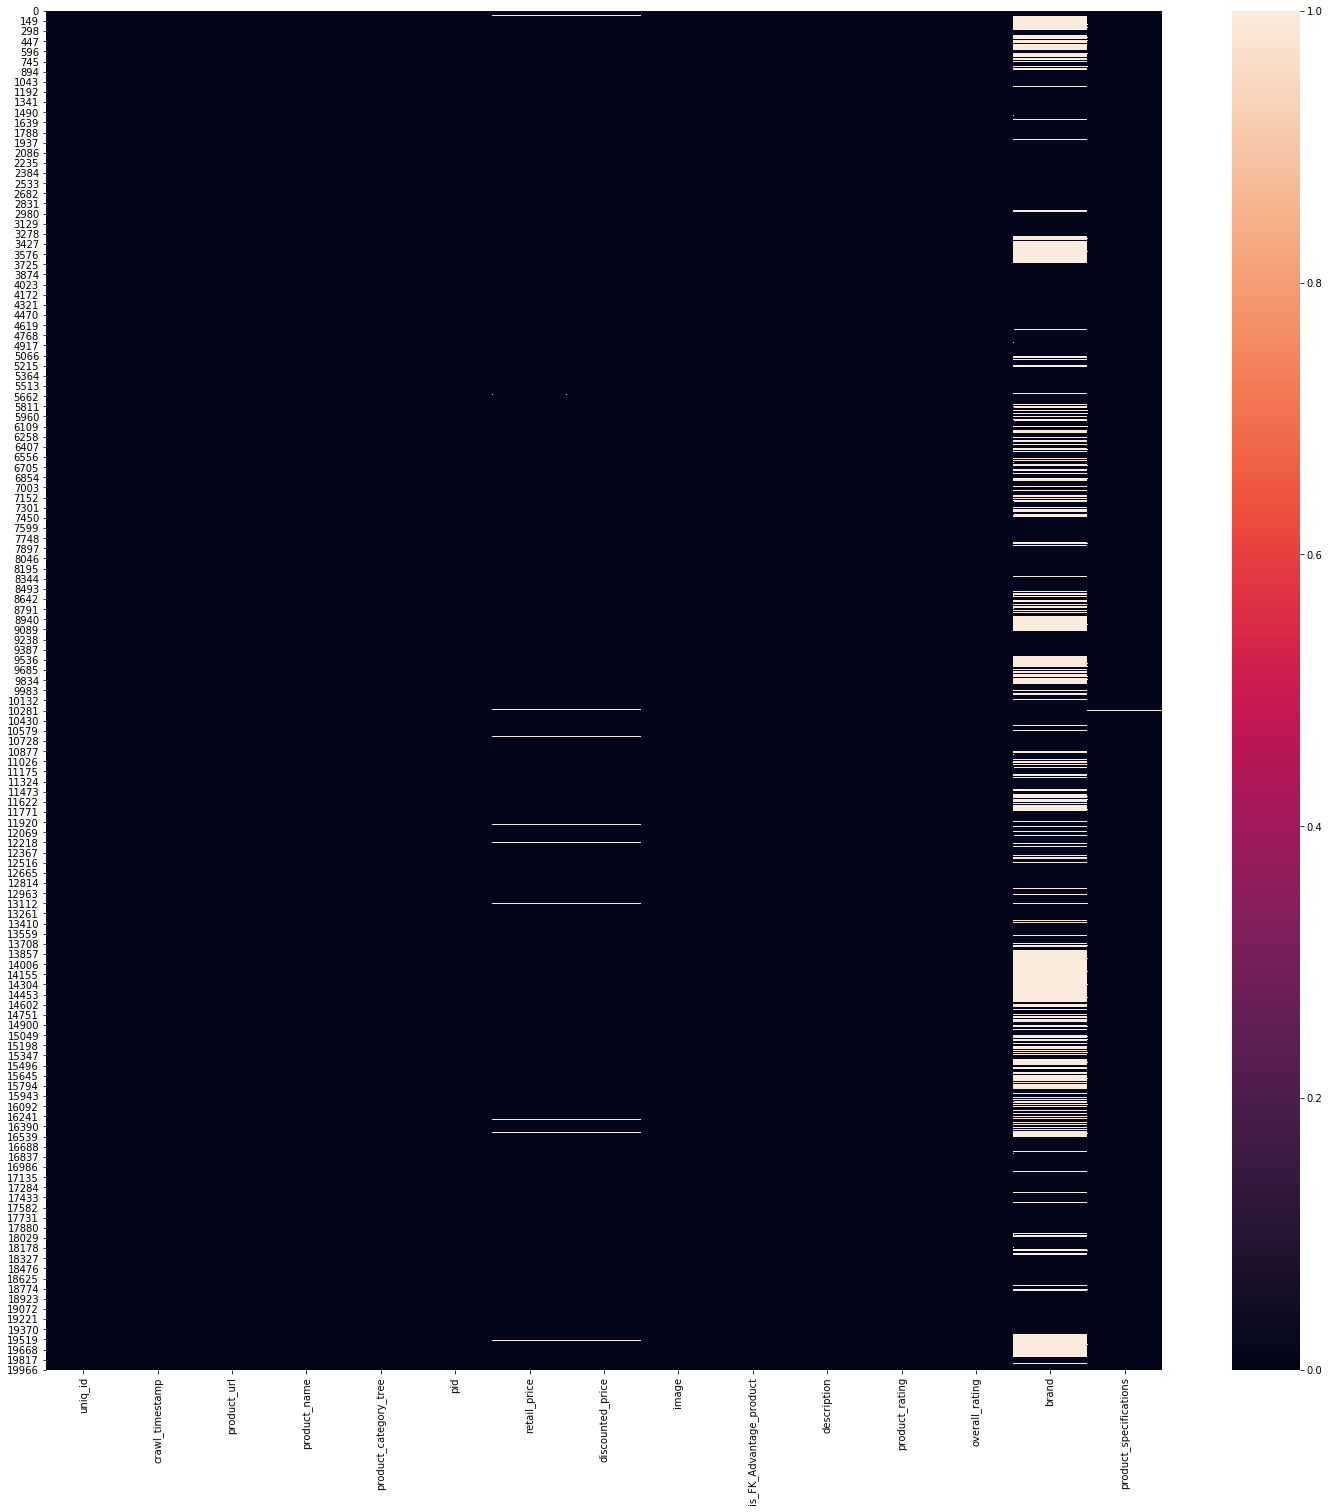

In [ ]:
plt.figure(figsize=(25,25))
sns.heatmap(df.isnull())

In [ ]:
df.isnull().sum()/df.shape[0] *100

uniq_id                     0.000
crawl_timestamp             0.000
product_url                 0.000
product_name                0.000
product_category_tree       0.000
pid                         0.000
retail_price                0.390
discounted_price            0.390
image                       0.015
is_FK_Advantage_product     0.000
description                 0.010
product_rating              0.000
overall_rating              0.000
brand                      29.320
product_specifications      0.070
dtype: float64

In [ ]:
null_var = df.isnull().sum()/df.shape[0] *100

In [ ]:
drop_col = null_var[null_var >20].keys()
drop_col

Index(['brand'], dtype='object')

In [ ]:
df2_drop_col=df.drop(columns=drop_col)

In [ ]:
df2_drop_col.shape

(20000, 14)

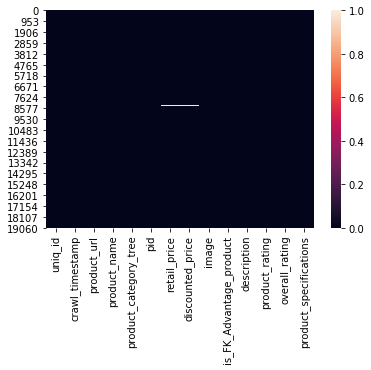

In [ ]:
sns.heatmap(df2_drop_col.isnull())

In [ ]:
df3_drop_rows = df2_drop_col.dropna()

In [ ]:
df3_drop_rows.shape

(19905, 14)

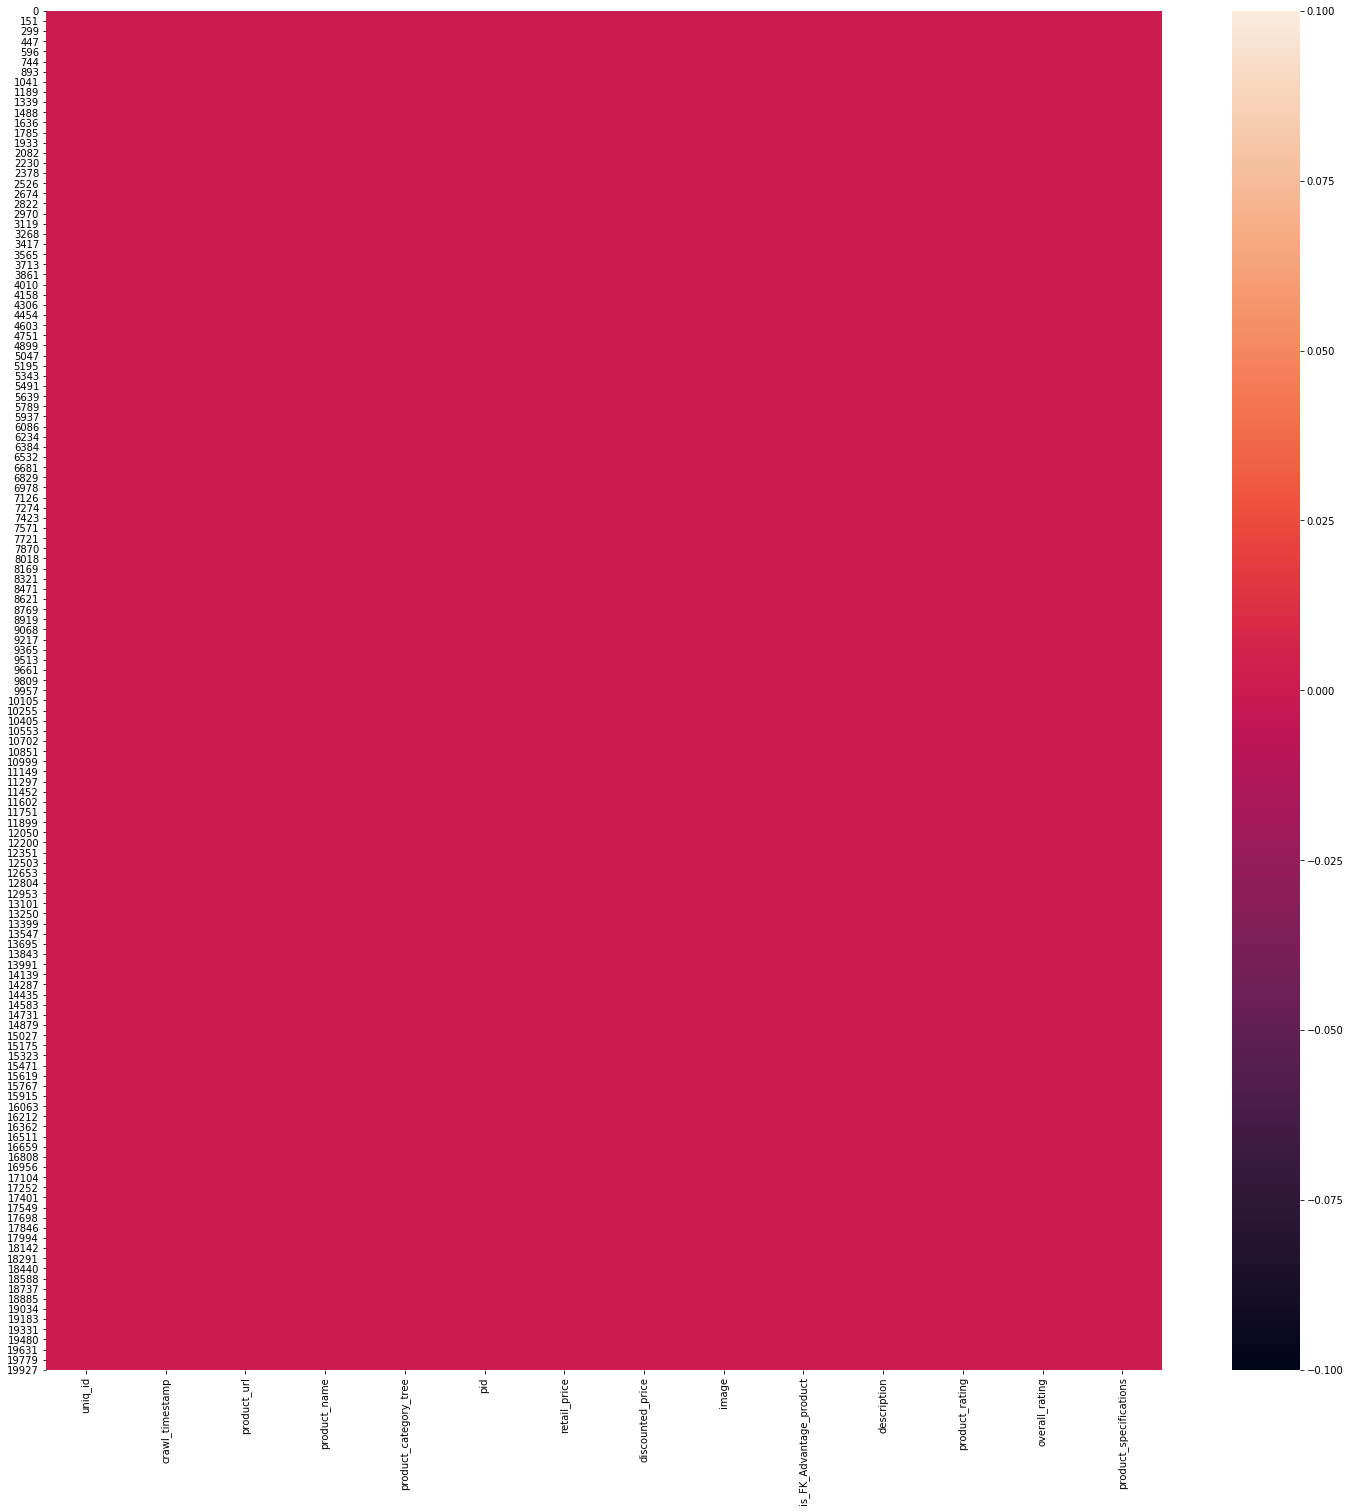

In [ ]:
plt.figure(figsize=(25,25))
sns.heatmap(df3_drop_rows.isnull())

In [ ]:
#no missing values are there
df3_drop_rows.isnull().sum().sum()

0

In [ ]:
df3_drop_rows.select_dtypes(include=['int64','float64']).columns

Index(['retail_price', 'discounted_price'], dtype='object')

In [ ]:
sns.distplot(df['retail_price'])

In [ ]:
sns.distplot(df3_drop_rows['retail_price'])

In [ ]:
sns.distplot(df['retail_price'])
sns.distplot(df3_drop_rows['retail_price'])

In [ ]:
num_var = ['retail_price', 'discounted_price']
plt.figure(figsize=(25,25))
for i, var in enumerate(num_var):
    plt.subplot(2,1,i+1)
    sns.distplot(df[var], bins=20)
    sns.distplot(df3_drop_rows[var], bins=20)

In [ ]:
df3_drop_rows.select_dtypes(include=['object']).columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'image', 'description',
       'product_rating', 'overall_rating', 'product_specifications'],
      dtype='object')

In [ ]:
pd.concat([df['uniq_id'].value_counts()/df.shape[0] * 100,
           df3_drop_rows['uniq_id'].value_counts()/df3_drop_rows.shape[0] * 100], axis=1, keys=['uniq_id_org','uniq_id_clean'])

In [ ]:
def cat_var_dist(var):
    return pd.concat([df[var].value_counts()/df.shape[0] * 100,
           df3_drop_rows[var].value_counts()/df3_drop_rows.shape[0] * 100], axis=1, keys=[var+'_org',var+'_clean'])
    
    

In [ ]:
cat_var_dist('uniq_id')